* Fraud detection in the insurance
industry has become a critical focus area as fraudulent activities
continue to pose significant financial threats.

* The increasing sophistication of fraud schemes necessitates the development of advanced detection methods that go beyond traditional rule-
based systems.

* This project explores the application of machine learning techniques to develop a
robust fraud detection system using a large dataset.

*  By leveraging large datasets, these
technologies enable the identification of complex patterns and anomalies indicative of fraudulent
behavior, allowing for more accurate and timely detection.



* The primary objective of this project
is to accurately classify whether an insurance claim is fraud or not thereby enhancing security

* In this study, we utilize a dataset taken from google dataset(https://data.mendeley.com/datasets/992mh7dk9y/2) which contains 5,000 records and 40 features, spanning customer information, policy details, incident characteristics, and claim
specifics


*  **Key features include** incident_severity,total_claim_amount,authorities_contacted,police_report_available,number_of_vehicles_involved,property_damage

* The target variable fraud reported
is a binary indicator of whether a claim is classified as fraud (Y) or not (N).

* This project explores the application of various supervised learning algorithms like Naive Bayes,
Support Vector Machines (SVM), Random Forests, and Logistic Regression etc to optimize
fraud detection in the insurance industry.

* To enhance model performance, the
project employs techniques such as Synthetic Minority Over-sampling Technique (SMOTE) to
address class imbalance, ensuring that the models are well-equipped to detect fraud even in cases
where fraudulent claims are rare.

* The results of this project demonstrate the potential of machine learning in transforming fraud
detection processes within the insurance industry. By detection of fraudulent claims, insurers can
significantly reduce their risk exposure and improve the efficiency of their operations


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/insurance_combined_synthetic.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [ ]:
df.shape

(5000, 40)

In [ ]:
#replace missing values-'?'
df.replace('?',np.nan,inplace=True)

In [ ]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,0.0
mean,204.766400,39.015400,540868.723400,1142.900000,1256.011034,1.120800e+06,501796.629200,25475.200000,-27244.64000,11.730400,1.820600,0.989200,1.47960,52954.520000,7473.858000,7470.574000,38010.088000,2005.075400,NaN
std,115.767306,9.181134,256101.682525,612.621132,239.553046,2.302274e+06,72106.486446,27693.137109,28271.24907,6.930839,1.014012,0.813644,1.11939,26569.406385,4909.829771,4885.301514,18946.087885,6.046075,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.00000,0.000000,1.000000,0.000000,0.00000,100.000000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,117.000000,32.000000,332571.000000,500.000000,1093.830000,0.000000e+00,448190.000000,0.000000,-52900.00000,6.000000,1.000000,0.000000,0.00000,42700.000000,4430.000000,4510.000000,30940.000000,2000.000000,NaN
50%,200.000000,38.000000,527945.000000,1000.000000,1257.040000,0.000000e+00,466818.000000,10000.000000,-24400.00000,12.000000,1.000000,1.000000,1.00000,58455.000000,6800.000000,6755.000000,42240.000000,2005.000000,NaN
75%,279.000000,44.000000,756459.000000,2000.000000,1412.310000,0.000000e+00,603381.000000,51300.000000,0.00000,18.000000,3.000000,2.000000,2.00000,70900.000000,11380.000000,11040.000000,51030.000000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.00000,23.000000,4.000000,2.000000,3.00000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           5000 non-null   int64  
 1   age                          5000 non-null   int64  
 2   policy_number                5000 non-null   int64  
 3   policy_bind_date             5000 non-null   object 
 4   policy_state                 5000 non-null   object 
 5   policy_csl                   5000 non-null   object 
 6   policy_deductable            5000 non-null   int64  
 7   policy_annual_premium        5000 non-null   float64
 8   umbrella_limit               5000 non-null   int64  
 9   insured_zip                  5000 non-null   int64  
 10  insured_sex                  5000 non-null   object 
 11  insured_education_level      5000 non-null   object 
 12  insured_occupation           5000 non-null   object 
 13  insured_hobbies   

Data Pre-Processing

In [ ]:
df.isna().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


Visualizing Missing Values

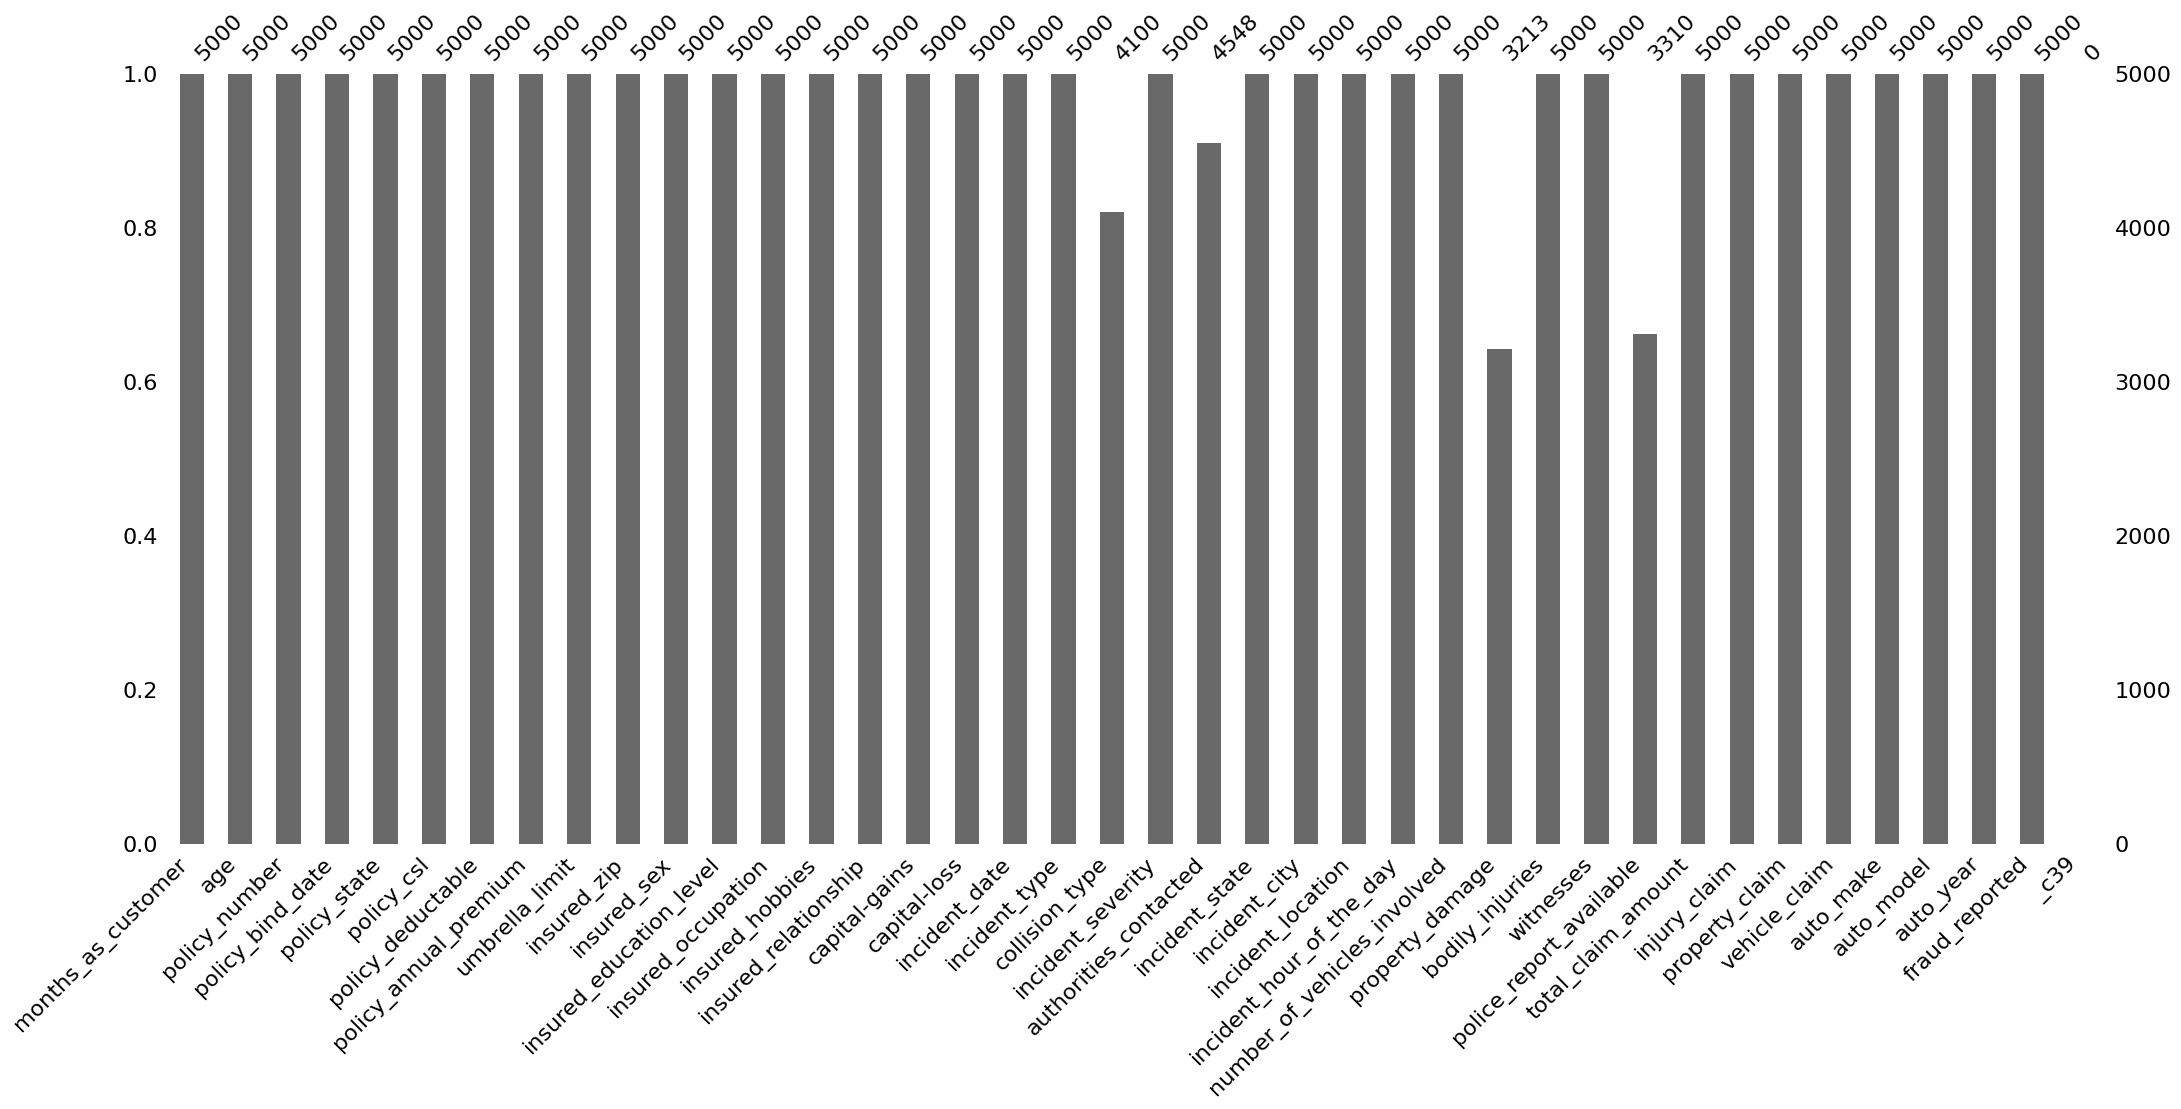

In [ ]:
import missingno as msno

msno.bar(df)
plt.show()

Handling Missing Values

In [ ]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [ ]:
df['authorities_contacted'] = df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0])

In [ ]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [ ]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [ ]:
df.isna().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [ ]:
df.nunique()

,0
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


In [ ]:
#dropping columns unneccessary for prediction
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df.drop(to_drop, inplace = True, axis = 1)

1.policy_number: It's just an ID and doesn't help with predictions.


2.policy_bind_date: The exact date isn't useful for analysis.


3.policy_state: State information might not be needed for this analysis.


4.insured_zip: Too many unique values and potential privacy issues.

5.incident_location: Specific locations aren't relevant for our analysis.


6.incident_date: Exact dates are not necessary unless we're tracking trends over time.

7.incident_state: Similar to policy_state, it's extra detail we don't need.

8.incident_city: Too much detail with too many unique values.

9.insured_hobbies: Hobbies don't usually affect insurance claims.

10.auto_make: Too many car brands and not enough impact on results.

11.auto_model: Like auto_make, too many models and not useful for analysis.

12.auto_year: The year of the car might not provide helpful information.

_c39: This looks like an extra, possibly empty column.


In [ ]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


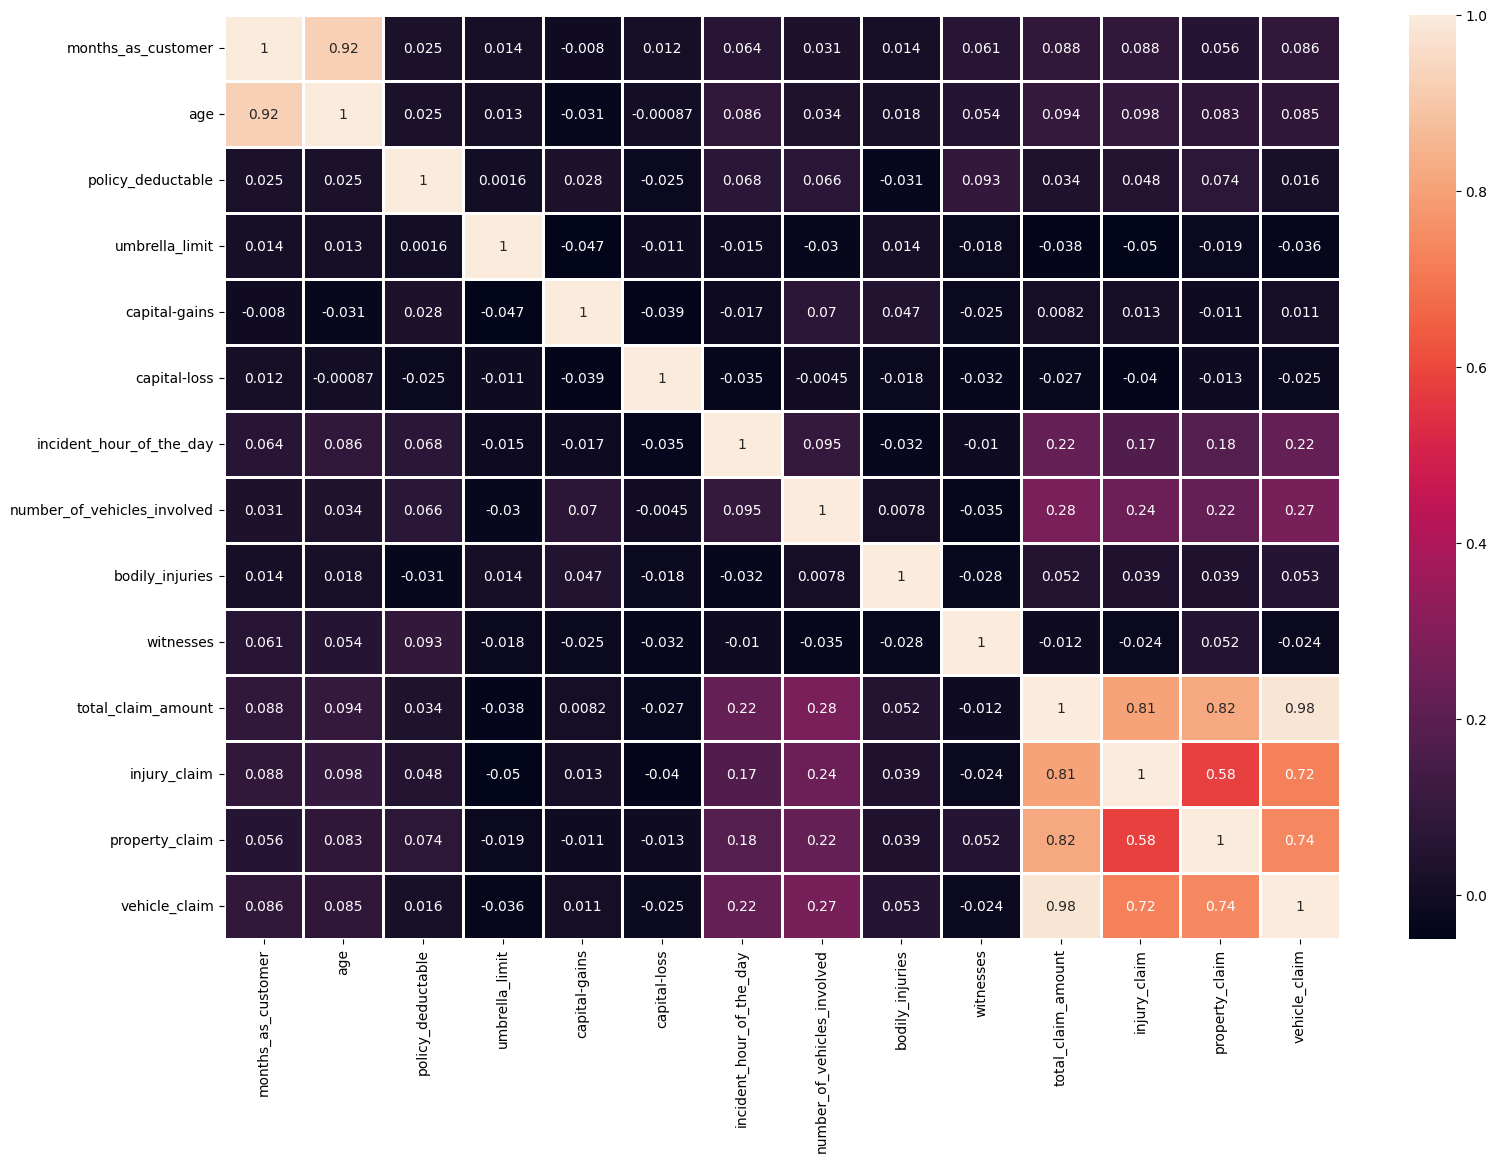

In [ ]:
# heatmap of numerical columns
num_col=df.select_dtypes(include=['int64']) #extracting categorical columns

plt.figure(figsize = (18, 12))

corr = num_col.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()


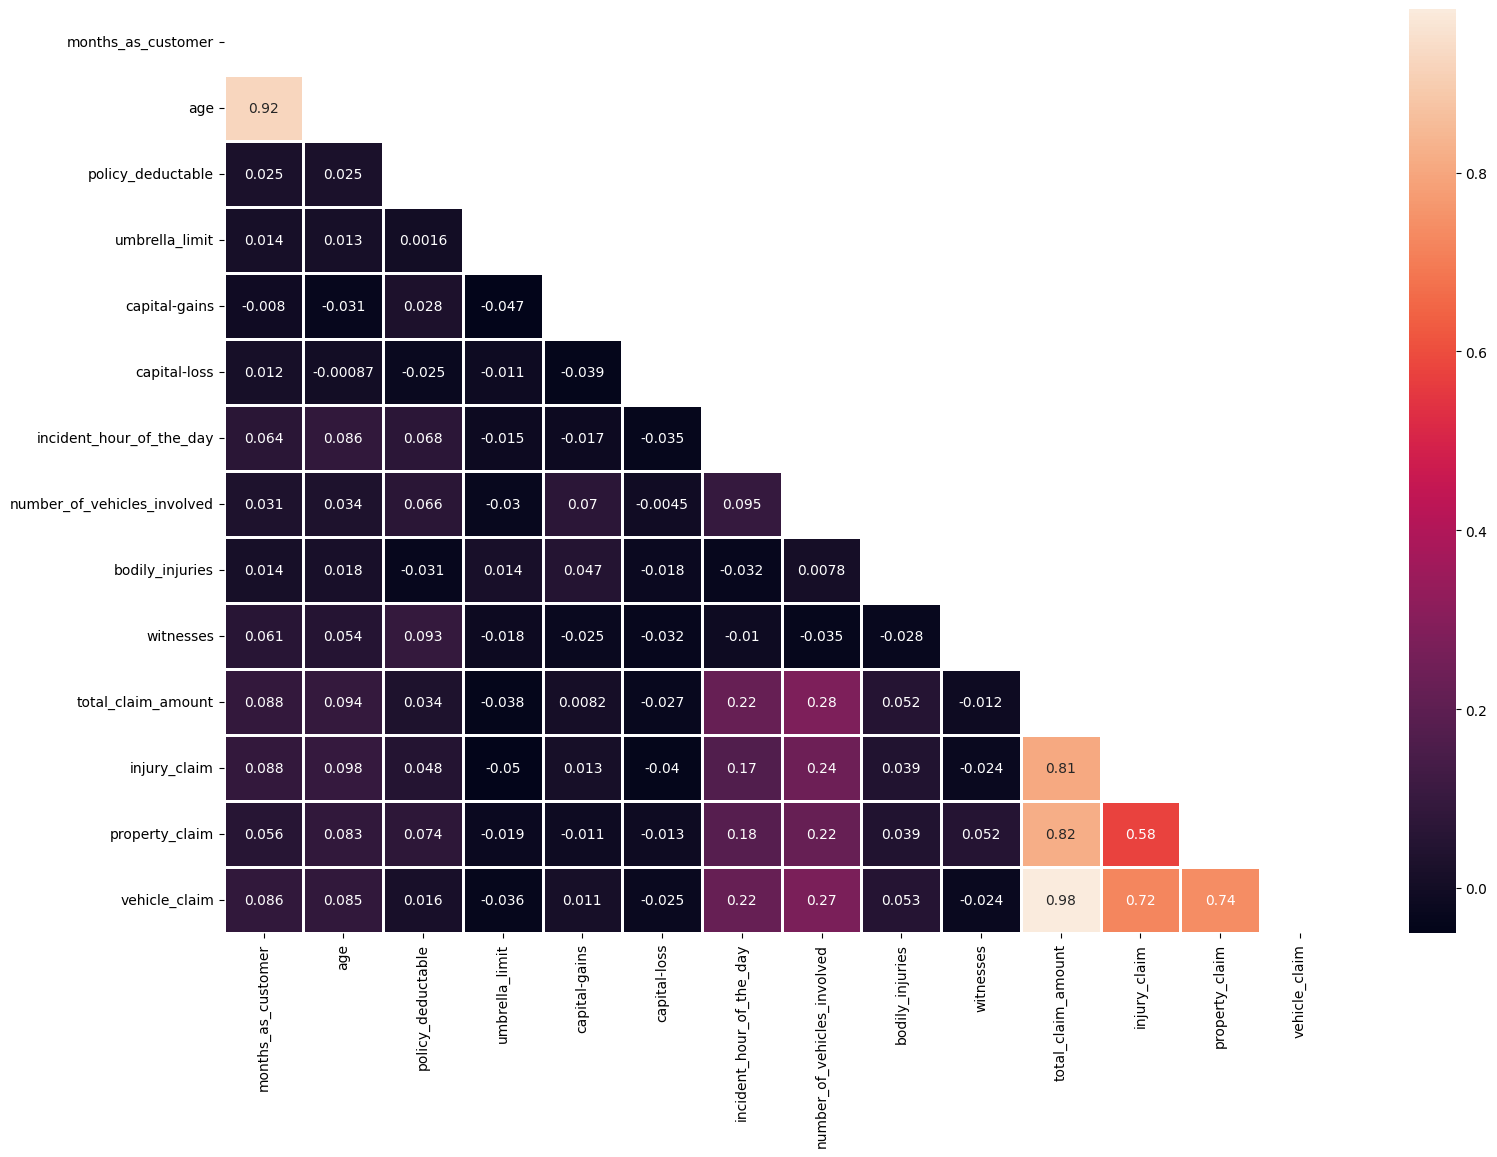

In [ ]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = num_col.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

From the above plot, we can see that there is high correlation between **Age** and **months_as_customer**.We will drop the "**Age**" column.

 Also there is high correlation between **total_clam_amount**, **injury_claim**, **property_claim**, **vehicle_claim** as total claim is the sum of all others. So we will drop the **total claim column**.

In [ ]:
df.shape

(5000, 27)

In [ ]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [ ]:
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [ ]:
# separating the feature and target columns
X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [ ]:
X.shape

(5000, 24)

In [ ]:
y.shape

(5000,)

**Encoding Categorical columns**

In [ ]:
# extracting categorical columns
cat_df = X.select_dtypes(include = ['object'])


In [ ]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO


In [ ]:
cat_df.shape

(5000, 11)

In [ ]:
cat_df.nunique()

,0
policy_csl,3
insured_sex,2
insured_education_level,7
insured_occupation,14
insured_relationship,6
incident_type,4
collision_type,3
incident_severity,4
authorities_contacted,4
property_damage,2


In [ ]:
cat_df=pd.get_dummies(cat_df,drop_first=True)


In [ ]:
cat_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,True,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,True,True
1,True,False,True,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
4,False,True,True,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False


In [ ]:
cat_df.shape

(5000, 40)

In [ ]:
# extracting the numerical columns
num_df = X.select_dtypes(include = ['int64'])
num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [ ]:
num_df.shape

(5000, 12)

In [ ]:
# combining the Numerical and Categorical dataframes to get the final dataset
X = pd.concat([num_df, cat_df], axis = 1)
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,False,True,False,False,False,False,False,True,True,True
1,228,2000,5000000,0,0,8,1,0,0,780,...,True,False,True,False,False,False,False,True,False,False
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,True,False,True,False,False,False,False,True,False,False
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,False,False,False,False,False,False,False,True,False,False
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,True,False,True,False,False,False,False,True,False,False


In [ ]:
'''plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()'''

'plt.figure(figsize = (25, 20))\nplotnumber = 1\n\nfor col in X.columns:\n    if plotnumber <= 24:\n        ax = plt.subplot(5, 5, plotnumber)\n        sns.distplot(X[col])\n        plt.xlabel(col, fontsize = 15)\n\n    plotnumber += 1\n\nplt.tight_layout()\nplt.show()'

Outlier Detection

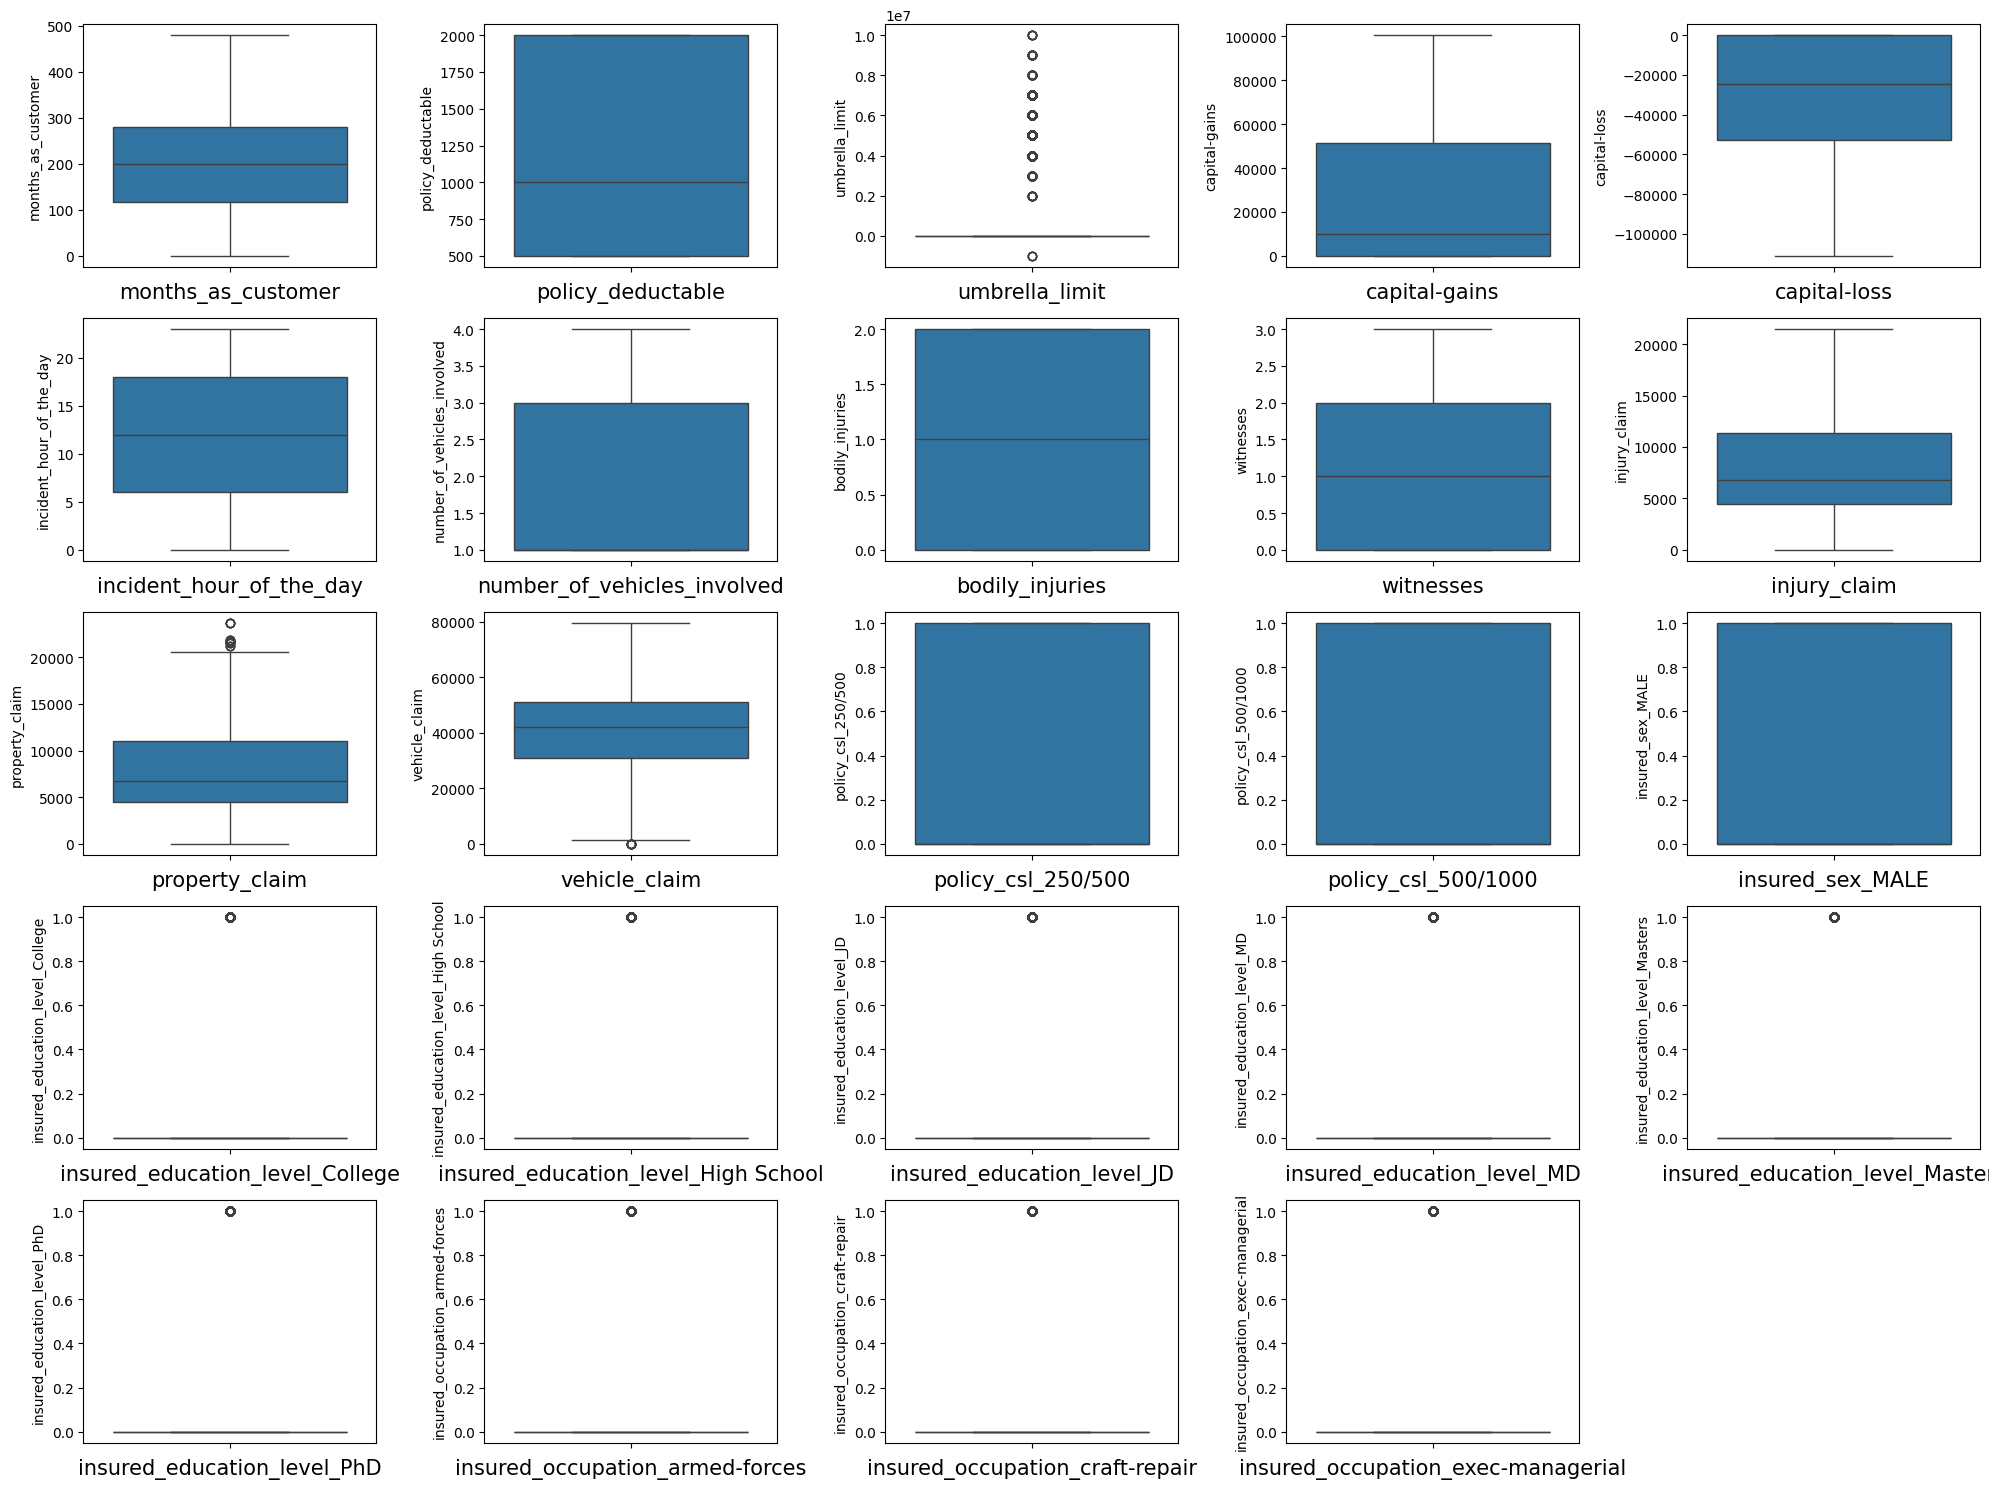

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1
plt.tight_layout()
plt.show()


In [ ]:
#splitting data into training set and test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=42)

In [ ]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
4227,274,500,0,0,0,7,1,2,1,860,...,True,False,True,False,False,False,False,True,False,False
4676,242,2000,6000000,0,-57000,3,3,0,1,12380,...,True,False,True,False,False,True,False,False,False,False
800,95,2000,0,48900,0,22,1,0,3,3480,...,True,False,True,False,False,False,False,True,True,False
3671,228,2000,5000000,0,0,8,1,0,0,780,...,True,False,True,False,False,False,False,True,False,False
4193,269,500,4000000,0,-41400,15,3,0,1,15180,...,True,False,False,True,False,False,False,False,False,False


In [192]:
num_df_train = X_train[['months_as_customer',
    'capital-gains',
    'capital-loss',
    'incident_hour_of_the_day',
    'injury_claim',
    'property_claim',
    'vehicle_claim',
    'bodily_injuries']]


In [193]:
# Scaling the numeric values in the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(num_df_train)

In [ ]:
#scaled_data.head()
#AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
#converting numpy to pandas
#Creating a DataFrame from Scaled Data:
scaled_num_df_train=pd.DataFrame(data=scaled_data,columns=num_df_train.columns,index=X_train.index)
scaled_num_df_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
4227,0.592554,-1.046822,-0.486181,-0.923133,0.966198,-0.681622,-0.813398,1.251571,-0.431754,-1.342446,-1.343944,-1.790386
4676,0.316883,1.396170,2.127697,-0.923133,-1.056728,-1.259146,1.160270,-1.203091,-0.431754,1.002200,1.009324,0.287932
800,-0.949479,1.396170,-0.486181,0.846869,0.966198,1.484092,-0.813398,-1.203091,1.350511,-0.809202,-0.097856,-0.711199
3671,0.196277,1.396170,1.692050,-0.923133,0.966198,-0.537242,-0.813398,-1.203091,-1.322886,-1.358728,-1.360286,-1.809347
4193,0.549480,-1.046822,1.256404,-0.923133,-0.503085,0.473425,1.160270,-1.203091,-0.431754,1.572079,1.581298,1.603603


In [194]:
scaled_num_df_train.columns


Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [ ]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
4227,274,500,0,0,0,7,1,2,1,860,...,True,False,True,False,False,False,False,True,False,False
4676,242,2000,6000000,0,-57000,3,3,0,1,12380,...,True,False,True,False,False,True,False,False,False,False
800,95,2000,0,48900,0,22,1,0,3,3480,...,True,False,True,False,False,False,False,True,True,False
3671,228,2000,5000000,0,0,8,1,0,0,780,...,True,False,True,False,False,False,False,True,False,False
4193,269,500,4000000,0,-41400,15,3,0,1,15180,...,True,False,False,True,False,False,False,False,False,False


In [ ]:
#Dropping the Original Numerical Columns:
X_train.drop(columns=scaled_num_df_train.columns,inplace=True)

In [ ]:
scaled_num_df_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
4227,0.592554,-1.046822,-0.486181,-0.923133,0.966198,-0.681622,-0.813398,1.251571,-0.431754,-1.342446,-1.343944,-1.790386
4676,0.316883,1.396170,2.127697,-0.923133,-1.056728,-1.259146,1.160270,-1.203091,-0.431754,1.002200,1.009324,0.287932
800,-0.949479,1.396170,-0.486181,0.846869,0.966198,1.484092,-0.813398,-1.203091,1.350511,-0.809202,-0.097856,-0.711199
3671,0.196277,1.396170,1.692050,-0.923133,0.966198,-0.537242,-0.813398,-1.203091,-1.322886,-1.358728,-1.360286,-1.809347
4193,0.549480,-1.046822,1.256404,-0.923133,-0.503085,0.473425,1.160270,-1.203091,-0.431754,1.572079,1.581298,1.603603


In [ ]:
pd.set_option('display.max_columns', None)
X_train.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
4227,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,True,False,False
4676,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False
800,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True,False
3671,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,False,False,False,True,False,False
4193,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


In [ ]:
scaled_num_df_train.shape

(4000, 12)

In [ ]:
X_train.shape

(4000, 40)

In [ ]:
#Concatenating the Scaled Data with the Rest of the Training Data:
X_train=pd.concat([scaled_num_df_train,X_train],axis=1)

In [ ]:
pd.set_option('display.max_columns', None)
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
4227,0.592554,-1.046822,-0.486181,-0.923133,0.966198,-0.681622,-0.813398,1.251571,-0.431754,-1.342446,-1.343944,-1.790386,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,True,False,False
4676,0.316883,1.396170,2.127697,-0.923133,-1.056728,-1.259146,1.160270,-1.203091,-0.431754,1.002200,1.009324,0.287932,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False
800,-0.949479,1.396170,-0.486181,0.846869,0.966198,1.484092,-0.813398,-1.203091,1.350511,-0.809202,-0.097856,-0.711199,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True,False
3671,0.196277,1.396170,1.692050,-0.923133,0.966198,-0.537242,-0.813398,-1.203091,-1.322886,-1.358728,-1.360286,-1.809347,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,False,False,False,True,False,False
4193,0.549480,-1.046822,1.256404,-0.923133,-0.503085,0.473425,1.160270,-1.203091,-0.431754,1.572079,1.581298,1.603603,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


In [ ]:
X_train.shape

(4000, 52)

In [ ]:
y_train = y_train.map({'N': 0, 'Y': 1})
y_test = y_test.map({'N': 0, 'Y': 1})


In [ ]:
print(y_train.unique())
print(y_test.unique())


[0 1]
[0 1]


In [195]:
X_train=X_train[['months_as_customer',
    'capital-gains',
    'capital-loss',
    'incident_hour_of_the_day',
    'injury_claim',
    'property_claim',
    'vehicle_claim',
    'bodily_injuries']]

In [196]:
X_test=X_test[['months_as_customer',
    'capital-gains',
    'capital-loss',
    'incident_hour_of_the_day',
    'injury_claim',
    'property_claim',
    'vehicle_claim',
    'bodily_injuries']]

In [197]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to generate synthetic samples for the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [198]:
# Combine the resampled features and target into a DataFrame
synthetic_data = pd.DataFrame(X_resampled, columns=X.columns)
synthetic_data['fraud_reported'] = y_resampled

In [199]:
# Show the class distribution after resampling
synthetic_data['fraud_reported'].value_counts(normalize=True) * 100

,proportion
fraud_reported,
0,50.0
1,50.0


In [200]:
#['months_as_customer', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'injury_claim', 'property_claim', 'vehicle_claim','bodily_injuries','witnesses','incident']


In [201]:
X_train.columns

Index(['months_as_customer', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'injury_claim', 'property_claim',
       'vehicle_claim', 'bodily_injuries'],
      dtype='object')

# **Models**

**Suport Vector Classifier**

In [202]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_resampled, y_resampled)

y_pred = svc.predict(X_test)

In [203]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.79175
Test accuracy of Support Vector Classifier is : 0.766
[[766   0]
 [234   0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       766
           1       0.00      0.00      0.00       234

    accuracy                           0.77      1000
   macro avg       0.38      0.50      0.43      1000
weighted avg       0.59      0.77      0.66      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**KNN**

In [204]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_resampled, y_resampled)

y_pred = knn.predict(X_test)

In [205]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Training accuracy of KNN is : 0.73025
Test accuracy of KNN is : 0.56
[[460 306]
 [134 100]]
              precision    recall  f1-score   support

           0       0.77      0.60      0.68       766
           1       0.25      0.43      0.31       234

    accuracy                           0.56      1000
   macro avg       0.51      0.51      0.49      1000
weighted avg       0.65      0.56      0.59      1000



**Decision Tree Classifier**

In [206]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_resampled, y_resampled)

y_pred = dtc.predict(X_test)


In [207]:
# accuracy_score, confusion_matrixs and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.516
[[377 389]
 [ 95 139]]
              precision    recall  f1-score   support

           0       0.80      0.49      0.61       766
           1       0.26      0.59      0.36       234

    accuracy                           0.52      1000
   macro avg       0.53      0.54      0.49      1000
weighted avg       0.67      0.52      0.55      1000



In [208]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [209]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)


{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.83775


In [210]:
# best estimator

dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)


In [211]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Training accuracy of Decision Tree is : 0.85075
Test accuracy of Decision Tree is : 0.514
[[394 372]
 [114 120]]
              precision    recall  f1-score   support

           0       0.78      0.51      0.62       766
           1       0.24      0.51      0.33       234

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.47      1000
weighted avg       0.65      0.51      0.55      1000



**Random Forest Classifier**

In [212]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_resampled, y_resampled)

y_pred = rand_clf.predict(X_test)

In [213]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.95825
Test accuracy of Random Forest is : 0.761
[[761   5]
 [234   0]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       766
           1       0.00      0.00      0.00       234

    accuracy                           0.76      1000
   macro avg       0.38      0.50      0.43      1000
weighted avg       0.59      0.76      0.66      1000



**Gradient Boosting Classifier**

In [214]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_resampled, y_resampled)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")


Training Accuracy of Gradient Boosting Classifier is 0.8035
Test Accuracy of Gradient Boosting Classifier is 0.7 

Confusion Matrix :- 
[[644 122]
 [178  56]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       766
           1       0.31      0.24      0.27       234

    accuracy                           0.70      1000
   macro avg       0.55      0.54      0.54      1000
weighted avg       0.67      0.70      0.68      1000



**Gradient Boosting Classifier**

In [215]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.859
Test Accuracy of Gradient Boosting Classifier is 0.448 

Confusion Matrix :- 
[[283 483]
 [ 69 165]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.80      0.37      0.51       766
           1       0.25      0.71      0.37       234

    accuracy                           0.45      1000
   macro avg       0.53      0.54      0.44      1000
weighted avg       0.68      0.45      0.48      1000



**Stochastic Gradient Boosting (SGB)**

In [216]:
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(X_resampled, y_resampled)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 0.8075
Test Accuracy of Stochastic Gradient Boosting is 0.766 

Confusion Matrix :- 
[[766   0]
 [234   0]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       766
           1       0.00      0.00      0.00       234

    accuracy                           0.77      1000
   macro avg       0.38      0.50      0.43      1000
weighted avg       0.59      0.77      0.66      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**Cat Boost Classifier**

In [217]:
pip install catboost


In [218]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=10)
cat.fit(X_resampled, y_resampled)

Learning rate set to 0.5
0:	learn: 0.6468673	total: 4.45ms	remaining: 40.1ms
1:	learn: 0.6126981	total: 7.7ms	remaining: 30.8ms
2:	learn: 0.5795609	total: 10.6ms	remaining: 24.7ms
3:	learn: 0.5512095	total: 13.4ms	remaining: 20.1ms
4:	learn: 0.5388880	total: 16.5ms	remaining: 16.5ms
5:	learn: 0.5198952	total: 19.2ms	remaining: 12.8ms
6:	learn: 0.5061708	total: 22.3ms	remaining: 9.56ms
7:	learn: 0.4942793	total: 25.9ms	remaining: 6.48ms
8:	learn: 0.4758961	total: 28.8ms	remaining: 3.2ms
9:	learn: 0.4666525	total: 31.5ms	remaining: 0us


In [219]:
# accuracy score, confusion matrix and classification report of cat boost

cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")



Training Accuracy of Cat Boost Classifier is 0.77975
Test Accuracy of Cat Boost Classifier is 0.339 

Confusion Matrix :- 
[[141 625]
 [ 36 198]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.80      0.18      0.30       766
           1       0.24      0.85      0.37       234

    accuracy                           0.34      1000
   macro avg       0.52      0.52      0.34      1000
weighted avg       0.67      0.34      0.32      1000



**Extra Trees Classifier**

In [220]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_resampled, y_resampled)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.764 

Confusion Matrix :- 
[[764   2]
 [234   0]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       766
           1       0.00      0.00      0.00       234

    accuracy                           0.76      1000
   macro avg       0.38      0.50      0.43      1000
weighted avg       0.59      0.76      0.66      1000



**LGBM Classifier**

In [221]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_resampled, y_resampled)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

[LightGBM] [Info] Number of positive: 3060, number of negative: 3060
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1726
[LightGBM] [Info] Number of data points in the train set: 6120, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

**Voting Classifier**

In [222]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Support Vector Classifier', svc), ('KNN', knn),  ('Decision Tree', dtc), ('Random Forest', rand_clf),
                ('Gradient Boosting Classifier', gb), ('SGB', sgb),
               ('Cat Boost', cat), ('Extra Trees Classifier', etc), ('LGBM', lgbm)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_resampled, y_resampled)

y_pred = vc.predict(X_test)

Learning rate set to 0.5
0:	learn: 0.6468673	total: 10.6ms	remaining: 95.3ms
1:	learn: 0.6126981	total: 21.6ms	remaining: 86.2ms
2:	learn: 0.5795609	total: 38.2ms	remaining: 89ms
3:	learn: 0.5512095	total: 51.3ms	remaining: 76.9ms
4:	learn: 0.5388880	total: 69.5ms	remaining: 69.5ms
5:	learn: 0.5198952	total: 81.7ms	remaining: 54.5ms
6:	learn: 0.5061708	total: 93.4ms	remaining: 40ms
7:	learn: 0.4942793	total: 111ms	remaining: 27.8ms
8:	learn: 0.4758961	total: 143ms	remaining: 15.9ms
9:	learn: 0.4666525	total: 166ms	remaining: 0us
[LightGBM] [Info] Number of positive: 3060, number of negative: 3060
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000853 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1726
[LightGBM] [Info] Number of data points in the train set: 6120, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No furthe

In [223]:
# accuracy_score, confusion_matrix and classification_report

vc_train_acc = accuracy_score(y_train, vc.predict(X_train))
vc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Voting Classifier is : {vc_train_acc}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Training accuracy of Voting Classifier is : 0.92625
Test accuracy of Voting Classifier is : 0.755
[[753  13]
 [232   2]]
              precision    recall  f1-score   support

           0       0.76      0.98      0.86       766
           1       0.13      0.01      0.02       234

    accuracy                           0.76      1000
   macro avg       0.45      0.50      0.44      1000
weighted avg       0.62      0.76      0.66      1000



# **Models Comparison**

In [224]:
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Decision Tree', 'Random Forest','Gradient Boost', 'SGB', 'Cat Boost', 'Extra Trees', 'LGBM', 'Voting Classifier'],
    'Score' : [svc_test_acc, knn_test_acc, dtc_test_acc, rand_clf_test_acc, gb_acc, sgb_acc, cat_acc, etc_acc, lgbm_acc, vc_test_acc]
})


sorted_models=models.sort_values(by = 'Score', ascending = False)
sorted_models


,Model,Score
0,SVC,0.766
5,SGB,0.766
7,Extra Trees,0.764
3,Random Forest,0.761
9,Voting Classifier,0.755
1,KNN,0.560
2,Decision Tree,0.514
8,LGBM,0.494
4,Gradient Boost,0.448
6,Cat Boost,0.339


In [225]:
s=models.sort_values(by = 'Score')


In [226]:
import plotly.express as px

px.bar(data_frame = s, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark',
       title = 'Models Comparison')
